In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_rows",None,"display.max_columns",None)

In [4]:
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
print(round(df.isnull().sum()/df.shape[0]*100,2))

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [7]:
df['sept_usage'] = df['total_ic_mou_9']+df['total_og_mou_9']+df['vol_2g_mb_9']+df['vol_3g_mb_9']
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,sept_usage
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0

In [8]:
df['sept_usage'].describe()

count    99999.000000
mean       659.269772
std        889.824655
min          0.000000
25%        133.735000
50%        386.240000
75%        867.310000
max      39227.890000
Name: sept_usage, dtype: float64

In [9]:
df['churn'] = df['sept_usage'].apply(lambda x: 0 if x>0 else 1)
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,sept_usage,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN

In [10]:
df['churn'].describe()

count    99999.000000
mean         0.101911
std          0.302533
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64

There is very high class imbalance present in the data.\
Churn rate is only 10.2%

In [11]:
sept_cols = []
for feature in list(df.columns):
    if('_9' in feature):
        sept_cols.append(feature)
    else:
        continue

In [12]:
sept_cols

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [13]:
df = df.drop(sept_cols, axis=1)
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,sept_usage,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.4,0.0,101.20,3.58,0.00,1
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.0,0.00,0.00,0.0,4,9,11,74,384,283,44,154,65,6/29/2014,7/31

In [14]:
df = df.drop('sept_usage', axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 173 entries, mobile_number to churn
dtypes: float64(136), int64(28), object(9)
memory usage: 132.0+ MB


In [16]:
print(round(df.isnull().sum()/df.shape[0]*100,2))

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2f_mou

Calculating the total **Recharge** amount of data + calls/SMS for the good phase i.e for June and July months\
But first we need to impute missing values in respective columns

In [17]:
df['total_rech_data_6'] = df['total_rech_amt_6'].fillna(0)
df['total_rech_data_7'] = df['total_rech_amt_7'].fillna(0)
df['av_rech_amt_data_6'] = df['av_rech_amt_data_6'].fillna(0)
df['av_rech_amt_data_7'] = df['av_rech_amt_data_7'].fillna(0)

In [18]:
df['total_rech_amt'] = df['total_rech_data_6']*df['av_rech_amt_data_6']+df['total_rech_data_7']*df['av_rech_amt_data_7']+df['total_rech_amt_6'] + df['total_rech_amt_7']
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_amt
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,362,252,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.4,0.0,101.20,3.58,1,155342.0
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.0,0.00,0.00,0.0,4,9,11,74,384,283,44,154,65,6/29/2

Taking average of both month's recharge amount

In [19]:
df['total_rech_amt'] = df['total_rech_amt']/2

In [20]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_amt
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,362,252,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.4,0.0,101.20,3.58,1,77671.0
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.0,0.00,0.00,0.0,4,9,11,74,384,283,44,154,65,6/29/20

We will decide our high value customers based on the avg. money spent by customers in good phase\
Customers whose recharge amount is more than 70th percentile are regarded as high value customers

In [21]:
df['total_rech_amt'].describe(percentiles=[0.25,0.5,0.7,0.9,0.95])

count    9.999900e+04
mean     3.283500e+04
std      2.118296e+05
min      0.000000e+00
25%      1.350000e+02
50%      3.400000e+02
70%      2.674800e+03
90%      7.263610e+04
95%      1.456298e+05
max      3.072980e+07
Name: total_rech_amt, dtype: float64

In [22]:
df = df[df['total_rech_amt']>2675]
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_amt
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,362,252,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1,77671.0
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.0,0.0,0.0,0.0,0.0,23.88,74.56,7.68,11.51,75.94,291.86,0.0,0.0,0.0,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.0,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.0,8.93,3.61,19.09,104.23,408.43,0.0,0.00,2.35,5.90,0.00,12.49,0.0,0.0,0.0,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.0,0.0,0.0,1.83,0.00,0.00,0.00,0.0,0.0,4,9,11,74,384,283,44,154,65,6/29/2014,7/31/2014,8/28/2

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 99998
Columns: 174 entries, mobile_number to total_rech_amt
dtypes: float64(135), int64(30), object(9)
memory usage: 40.1+ MB


We have around 30 thousand high value customers

In [24]:
df = df.drop('total_rech_amt', axis=1) 

In [25]:
df = df.drop('sep_vbc_3g', axis=1)

Now, we will take care of missing values and imputing them with proper representative value

In [26]:
print(round(df.isnull().sum()/df.shape[0]*100,2))

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.35
std_og_t2o_mou               1.35
loc_ic_t2o_mou               1.35
last_date_of_month_6         0.00
last_date_of_month_7         0.16
last_date_of_month_8         0.73
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  3.39
onnet_mou_7                  3.45
onnet_mou_8                  5.80
offnet_mou_6                 3.39
offnet_mou_7                 3.45
offnet_mou_8                 5.80
roam_ic_mou_6                3.39
roam_ic_mou_7                3.45
roam_ic_mou_8                5.80
roam_og_mou_6                3.39
roam_og_mou_7                3.45
roam_og_mou_8                5.80
loc_og_t2t_mou_6             3.39
loc_og_t2t_mou_7             3.45
loc_og_t2t_mou_8             5.80
loc_og_t2m_mou_6             3.39
loc_og_t2m_mou_7             3.45
loc_og_t2m_mou_8             5.80
loc_og_t2f_mou

Imputing the columns regarding last date of month or last date of recharge\
i.e `last_date_of_month_6`, `date_of_last_rech_6` and `date_of_last_rech_data_6`, etc and similarly for 7th and 8th month

Imputing the missing dates by their respective mode values

In [27]:
df['last_date_of_month_7'] = df['last_date_of_month_7'].fillna(df['last_date_of_month_7'].value_counts().index[0])
df['last_date_of_month_8'] = df['last_date_of_month_8'].fillna(df['last_date_of_month_8'].value_counts().index[0])

df['date_of_last_rech_6'] = df['date_of_last_rech_6'].fillna(df['date_of_last_rech_6'].value_counts().index[0])
df['date_of_last_rech_7'] = df['date_of_last_rech_7'].fillna(df['date_of_last_rech_7'].value_counts().index[0])
df['date_of_last_rech_8'] = df['date_of_last_rech_8'].fillna(df['date_of_last_rech_8'].value_counts().index[0])

df['date_of_last_rech_data_6'] = df['date_of_last_rech_data_6'].fillna(df['date_of_last_rech_data_6'].value_counts().index[0])
df['date_of_last_rech_data_7'] = df['date_of_last_rech_data_7'].fillna(df['date_of_last_rech_data_7'].value_counts().index[0])
df['date_of_last_rech_data_8'] = df['date_of_last_rech_data_8'].fillna(df['date_of_last_rech_data_8'].value_counts().index[0])

In [28]:
print(round(df.isnull().sum()/df.shape[0]*100,2))

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.35
std_og_t2o_mou               1.35
loc_ic_t2o_mou               1.35
last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  3.39
onnet_mou_7                  3.45
onnet_mou_8                  5.80
offnet_mou_6                 3.39
offnet_mou_7                 3.45
offnet_mou_8                 5.80
roam_ic_mou_6                3.39
roam_ic_mou_7                3.45
roam_ic_mou_8                5.80
roam_og_mou_6                3.39
roam_og_mou_7                3.45
roam_og_mou_8                5.80
loc_og_t2t_mou_6             3.39
loc_og_t2t_mou_7             3.45
loc_og_t2t_mou_8             5.80
loc_og_t2m_mou_6             3.39
loc_og_t2m_mou_7             3.45
loc_og_t2m_mou_8             5.80
loc_og_t2f_mou

We can observe that there is specific pattern in the missing values of June, July, Aug columns.\
Now, we will impute 0 for all the missing values in the dataset

In [29]:
df = df.fillna(0)

#### Cleaned Dataset

In [30]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.0,0.00,1.15,0.00,0.00,5.44,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,362,252,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.0,0.0,0.0,0.0,0.0,23.88,74.56,7.68,11.51,75.94,291.86,0.0,0.0,0.0,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.0,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.0,8.93,3.61,19.09,104.23,408.43,0.0,0.00,2.35,5.90,0.00,12.49,0.0,0.0,0.0,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.0,0.0,0.0,1.83,0.00,0.00,0.00,0.0,0.0,4,9,11,74,384,283,44,154,65,6/29/2014,7/31/2014,8/28/2014,4

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 99998
Columns: 172 entries, mobile_number to churn
dtypes: float64(133), int64(30), object(9)
memory usage: 39.6+ MB


Converting date columns into datetime format

In [32]:
df['last_date_of_month_6'] = pd.to_datetime(df['last_date_of_month_6'], format='%m/%d/%Y')
df['last_date_of_month_7'] = pd.to_datetime(df['last_date_of_month_7'], format='%m/%d/%Y')
df['last_date_of_month_8'] = pd.to_datetime(df['last_date_of_month_8'], format='%m/%d/%Y')

df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'], format='%m/%d/%Y')
df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'], format='%m/%d/%Y')
df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'], format='%m/%d/%Y')

df['date_of_last_rech_data_6'] = pd.to_datetime(df['date_of_last_rech_data_6'], format='%m/%d/%Y')
df['date_of_last_rech_data_7'] = pd.to_datetime(df['date_of_last_rech_data_7'], format='%m/%d/%Y')
df['date_of_last_rech_data_8'] = pd.to_datetime(df['date_of_last_rech_data_8'], format='%m/%d/%Y')

Extracting the day of the month

In [33]:
df['last_date_of_month_6'] = df['last_date_of_month_6'].apply(lambda x: x.day)
df['last_date_of_month_7'] = df['last_date_of_month_7'].apply(lambda x: x.day)
df['last_date_of_month_8'] = df['last_date_of_month_8'].apply(lambda x: x.day)

df['date_of_last_rech_6'] = df['date_of_last_rech_6'].apply(lambda x: x.day)
df['date_of_last_rech_7'] = df['date_of_last_rech_7'].apply(lambda x: x.day)
df['date_of_last_rech_8'] = df['date_of_last_rech_8'].apply(lambda x: x.day)

df['date_of_last_rech_data_6'] = df['date_of_last_rech_data_6'].apply(lambda x: x.day)
df['date_of_last_rech_data_7'] = df['date_of_last_rech_data_7'].apply(lambda x: x.day)
df['date_of_last_rech_data_8'] = df['date_of_last_rech_data_8'].apply(lambda x: x.day)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 99998
Columns: 172 entries, mobile_number to churn
dtypes: float64(133), int64(39)
memory usage: 39.6 MB


In [35]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,30,31,31,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.0,0.00,1.15,0.00,0.00,5.44,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,4,3,2,362,252,252,252,252,252,21,16,8,252,252,252,21,16,8,362,252,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1
1,7001865778,109,0.0,0.0,0.0,30,31,31,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.0,0.0,0.0,0.0,0.0,23.88,74.56,7.68,11.51,75.94,291.86,0.0,0.0,0.0,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.0,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.0,8.93,3.61,19.09,104.23,408.43,0.0,0.00,2.35,5.90,0.00,12.49,0.0,0.0,0.0,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.0,0.0,0.0,1.83,0.00,0.00,0.00,0.0,0.0,4,9,11,74,384,283,44,154,65,29,31,28,44,23,30,30,25,10,74,384,2.0,0.0,154.0,25.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,154.0,50.0,0.00,108.07,365.47,0.00

Now we have a dataset which have only numerical variables and no missing values.\
We will use this dataset for building predictive and interpretable models

## Building Predictive model

- Our dataset has very high class imbalance. Only 10.2% values represent customer churn
- Model built on this dataset will automatically be biased towards the majority class
- We will use Random Forest with Bootstrap class weighting to deal with class imbalance

In [36]:
df1 = df.copy()

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, plot_roc_curve
from sklearn.model_selection import GridSearchCV

In [38]:
X = df1.drop(['mobile_number','circle_id','churn'], axis=1)
y = df1['churn']

In [39]:
# StandardScaler object instance
scaler = StandardScaler()

In [40]:
X = scaler.fit_transform(X)

In [41]:
X.shape

(30000, 169)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=df1['churn'].values, random_state=42)

In [43]:
y_train.mean()

0.08428571428571428

In [44]:
y_test.mean()

0.08433333333333333

We have balanced churn % in both training and test set as can be seen above. But still we have to tackle the imbalance of classes

## Applying PCA on the data

In [45]:
pca = PCA(random_state=42)

In [46]:
pca.fit(X_train)

PCA(random_state=42)

In [47]:
pca.components_

array([[-1.68934289e-20, -0.00000000e+00,  1.66533454e-16, ...,
         7.44517810e-02,  7.29040028e-02,  6.79634533e-02],
       [-1.93570545e-20, -1.38777878e-17, -6.24500451e-17, ...,
         1.24374781e-01,  1.24550050e-01,  1.18944844e-01],
       [ 7.05507322e-19, -2.22044605e-16,  0.00000000e+00, ...,
        -7.85884728e-03, -9.00381455e-03, -5.24626840e-03],
       ...,
       [ 9.99999508e-01, -5.41136548e-04,  1.54933786e-04, ...,
        -6.61363325e-18,  3.71339244e-18,  1.68051337e-18],
       [-0.00000000e+00, -5.78404020e-02,  3.03541285e-01, ...,
         2.08166817e-17,  3.29597460e-17, -5.89805982e-17],
       [-0.00000000e+00,  2.73895237e-01,  6.11954184e-01, ...,
        -1.11022302e-16,  2.77555756e-17,  2.77555756e-17]])

In [48]:
pca.explained_variance_ratio_

array([1.20894609e-01, 8.73187196e-02, 5.80524735e-02, 4.76462642e-02,
       3.42139489e-02, 3.08372662e-02, 2.65999395e-02, 2.47907101e-02,
       2.24390584e-02, 2.19919471e-02, 2.14861780e-02, 1.98893636e-02,
       1.83424719e-02, 1.70932441e-02, 1.62579824e-02, 1.52086080e-02,
       1.47137030e-02, 1.45601616e-02, 1.39393442e-02, 1.31875327e-02,
       1.25676894e-02, 1.14952782e-02, 1.10880464e-02, 1.04201374e-02,
       1.02376228e-02, 9.91871195e-03, 9.58935677e-03, 8.96393399e-03,
       8.75692462e-03, 8.57156329e-03, 7.86881266e-03, 7.62210497e-03,
       7.40047117e-03, 7.18697353e-03, 7.03694421e-03, 6.89575632e-03,
       6.70844267e-03, 6.48731333e-03, 6.30291839e-03, 5.97023442e-03,
       5.88157580e-03, 5.71829476e-03, 5.57400829e-03, 5.47206951e-03,
       5.39856346e-03, 5.22652194e-03, 5.15972801e-03, 4.92359432e-03,
       4.67080383e-03, 4.55433606e-03, 4.41419336e-03, 4.23733477e-03,
       4.07160330e-03, 3.95685946e-03, 3.92134697e-03, 3.81113420e-03,
      

In [49]:
variance_sum = np.cumsum(pca.explained_variance_ratio_)

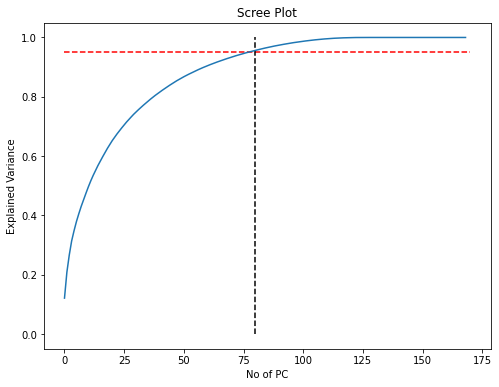

In [50]:
fig = plt.figure(figsize=(8,6))
plt.plot(variance_sum)
plt.hlines(y=0.95, xmax=170, xmin=0, colors='r', linestyles='--')
plt.vlines(x=80, ymax=1, ymin=0, colors='k', linestyles='--')
plt.xlabel('No of PC')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

For total variance of 95%, we need around 80 Principal Components

### Performing PCA again with 80 components

In [51]:
pca_80 = PCA(n_components=80, random_state=42)

In [52]:
X_train_pca = pca_80.fit_transform(X_train)

In [53]:
X_train_pca.shape

(21000, 80)

#### Checking with the correlation heatmap matrix

In [54]:
corrmat = np.corrcoef(X_train_pca.transpose())

In [55]:
corrmat.shape

(80, 80)

Plotting the sub-matrix of the correlation matrix because the original matrix has 80 elements which is difficult to show here.

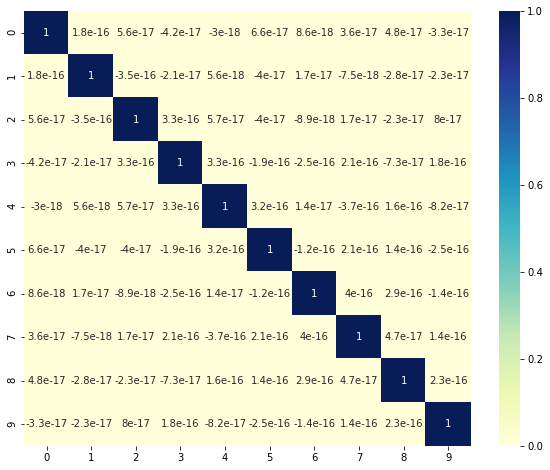

In [56]:
corrmat_sub = corrmat[:10,:10]
plt.figure(figsize=(10,8))
sns.heatmap(corrmat_sub, annot=True, cmap='YlGnBu')
plt.show()

In [57]:
X_test_pca = pca_80.transform(X_test)
X_test_pca.shape

(9000, 80)

### Applying Random Forest with Bootstrap class weighting

- Class weightage is inversely proportional to its frequency
- In other words, misclassification of minor class leads to heavy penalty on the algorithm
- Bootstrap class weighting change the class weighting based on the class distribution in each bootstrap sample, instead of the entire training dataset.

In [58]:
# Initialize the instance of RandomForest Classifier
rf_default = RandomForestClassifier(random_state=42, class_weight='balanced_subsample', oob_score=True)

In [59]:
rf_default.fit(X_train_pca, y_train)

RandomForestClassifier(class_weight='balanced_subsample', oob_score=True,
                       random_state=42)

In [60]:
y_train_pred = rf_default.predict(X_train_pca)

In [61]:
y_pred = rf_default.predict(X_test_pca)

In [62]:
# FOR TRAINING SET
cm = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix of traning set:\n{}'.format(cm))
recall = recall_score(y_train, y_train_pred)
print('\nRecall score of train set: {}'.format(recall))

Confusion Matrix of traning set:
[[19230     0]
 [    0  1770]]

Recall score of train set: 1.0


In [63]:
# FOR TEST SET
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix of test set:\n{}'.format(cm))
recall = recall_score(y_test, y_pred)
print('\nRecall score of test set: {}'.format(recall))

Confusion Matrix of test set:
[[8203   38]
 [ 700   59]]

Recall score of test set: 0.077733860342556


The model is overfitting. Now we do hyperparameter tuning

### Hyper-parameter tuning

In [64]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced_subsample', n_jobs=-1)

In [65]:
params = {'max_depth':[2,3,4,5],
         'min_samples_leaf':[5,10,15,20,50],
         'n_estimators':[10,20,50,100]}

In [66]:
grid_search = GridSearchCV(estimator=rf,
                          param_grid=params,
                          cv=4, n_jobs=-1, verbose=1, scoring='recall')

In [67]:
%%time
grid_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits
Wall time: 3min 40s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 15, 20, 50],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='recall', verbose=1)

In [68]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.513721,0.118061,0.105757,0.004616,2,5,10,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.789593,0.714932,0.758465,0.744921,0.751978,0.026829,30
1,0.722234,0.145463,0.220314,0.103769,2,5,20,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.766968,0.703620,0.767494,0.715576,0.738415,0.029126,54
2,1.520991,0.467788,1.922051,0.889121,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.794118,0.723982,0.776524,0.747178,0.760450,0.026916,3
3,3.608244,0.206700,0.300572,0.092542,2,5,100,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.778281,0.723982,0.781038,0.740406,0.755927,0.024452,21
4,1.026238,0.854563,0.062709,0.032136,2,10,10,"{'max_depth': 2, 'min_samples_leaf': 10, 'n_es...",0.789593,0.714932,0.758465,0.744921,0.751978,0.026829,30


In [69]:
cv_results.nlargest(5,'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
23,7.030022,0.331477,0.628355,0.261009,3,5,100,"{'max_depth': 3, 'min_samples_leaf': 5, 'n_est...",0.785068,0.721719,0.778781,0.758465,0.761008,0.024723,1
27,6.498316,0.249580,0.987916,0.287282,3,10,100,"{'max_depth': 3, 'min_samples_leaf': 10, 'n_es...",0.785068,0.721719,0.778781,0.758465,0.761008,0.024723,1
2,1.520991,0.467788,1.922051,0.889121,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.794118,0.723982,0.776524,0.747178,0.760450,0.026916,3
6,1.695047,0.247696,1.692435,0.829313,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'n_es...",0.794118,0.723982,0.776524,0.747178,0.760450,0.026916,3
10,2.070299,0.115435,0.236347,0.051561,2,15,50,"{'max_depth': 2, 'min_samples_leaf': 15, 'n_es...",0.794118,0.723982,0.776524,0.747178,0.760450,0.026916,3


In [70]:
rf_best = grid_search.best_estimator_

In [71]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 100}

In [72]:
y_pred = rf_best.predict(X_test_pca)

We can conclude that the model is not overfitting

In [73]:
# FOR TRAINING SET
print('Recall score of train set: {}'.format(grid_search.best_score_))

Recall score of train set: 0.7610083449945355


In [74]:
# FOR TEST SET
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix of test set:\n{}'.format(cm))
recall = recall_score(y_test, y_pred)
print('\nRecall score of test set: {}'.format(recall))

Confusion Matrix of test set:
[[6647 1594]
 [ 198  561]]

Recall score of test set: 0.7391304347826086


### Now applying Random Forest With Random Undersampling

We will try to improve the recall score (Sensitivity) which is more important to us. As it indicates the churned customers

In [75]:
#pip install imbalanced-learn

In [76]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [77]:
# Selecting the arbitrary parameters for balanced RF classifier
bal_rf = BalancedRandomForestClassifier(random_state=42, max_depth=4, oob_score=True)

In [78]:
bal_rf.fit(X_train_pca, y_train)

BalancedRandomForestClassifier(max_depth=4, oob_score=True, random_state=42)

In [79]:
# Training set
y_train_pred = bal_rf.predict(X_train_pca)
print('Confusion matrix: \n{}'.format(confusion_matrix(y_train, y_train_pred)))
print('Recall score of training set: {}'.format(recall_score(y_train, y_train_pred)))

Confusion matrix: 
[[15397  3833]
 [  318  1452]]
Recall score of training set: 0.8203389830508474


In [80]:
# Test set
y_pred = bal_rf.predict(X_test_pca)
print('Confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))
print('Recall score of test set: {}'.format(recall_score(y_test, y_pred)))

Confusion matrix: 
[[6564 1677]
 [ 177  582]]
Recall score of test set: 0.766798418972332


### Tuning the hyper-parameters

In [81]:
bal_rf_default = BalancedRandomForestClassifier(random_state=42, n_jobs=-1)

In [82]:
params = {'max_depth':[3,4,5,6,7],
         'min_samples_leaf':[5,10,15,20],
         'n_estimators':[20,50,100,200]}

In [83]:
grid_search_balRF = GridSearchCV(estimator=bal_rf_default,
                          param_grid=params,
                          cv=4, n_jobs=-1, verbose=1, scoring='recall')

In [84]:
%%time
grid_search_balRF.fit(X_train_pca, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits
Wall time: 2min 47s


GridSearchCV(cv=4,
             estimator=BalancedRandomForestClassifier(n_jobs=-1,
                                                      random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'n_estimators': [20, 50, 100, 200]},
             scoring='recall', verbose=1)

In [85]:
cv_results = pd.DataFrame(grid_search_balRF.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.626227,0.140713,0.342409,0.148204,3,5,20,"{'max_depth': 3, 'min_samples_leaf': 5, 'n_est...",0.787330,0.708145,0.772009,0.740406,0.751973,0.030440,78
1,1.600688,0.279261,0.584705,0.294797,3,5,50,"{'max_depth': 3, 'min_samples_leaf': 5, 'n_est...",0.812217,0.739819,0.792325,0.751693,0.774014,0.029421,61
2,3.347766,0.497848,0.533422,0.279409,3,5,100,"{'max_depth': 3, 'min_samples_leaf': 5, 'n_est...",0.800905,0.739819,0.801354,0.744921,0.771750,0.029436,66
3,6.821473,0.234724,0.400941,0.107997,3,5,200,"{'max_depth': 3, 'min_samples_leaf': 5, 'n_est...",0.809955,0.733032,0.803612,0.758465,0.776266,0.031894,54
4,1.391850,0.047782,0.465922,0.164823,3,10,20,"{'max_depth': 3, 'min_samples_leaf': 10, 'n_es...",0.791855,0.710407,0.769752,0.744921,0.754234,0.030264,77


Sorting the models based on highest recall value

In [86]:
cv_results.nlargest(5,'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
69,2.280057,0.198107,0.370365,0.216847,7,10,50,"{'max_depth': 7, 'min_samples_leaf': 10, 'n_es...",0.834842,0.760181,0.821670,0.781038,0.799433,0.030114,1
71,7.069460,0.229745,0.889386,0.231269,7,10,200,"{'max_depth': 7, 'min_samples_leaf': 10, 'n_es...",0.828054,0.764706,0.817156,0.787810,0.799432,0.024871,2
67,7.144522,0.259972,1.001899,0.263783,7,5,200,"{'max_depth': 7, 'min_samples_leaf': 5, 'n_est...",0.834842,0.755656,0.814898,0.792325,0.799430,0.029410,3
75,7.449726,0.256602,0.850869,0.173216,7,15,200,"{'max_depth': 7, 'min_samples_leaf': 15, 'n_es...",0.821267,0.773756,0.810384,0.790068,0.798869,0.018319,4
74,3.212154,0.265802,0.976520,0.076597,7,15,100,"{'max_depth': 7, 'min_samples_leaf': 15, 'n_es...",0.823529,0.760181,0.823928,0.783296,0.797733,0.027250,5


In [87]:
grid_search_balRF.best_params_

{'max_depth': 7, 'min_samples_leaf': 10, 'n_estimators': 50}

In [88]:
bal_rf_best = grid_search_balRF.best_estimator_

In [89]:
y_pred = bal_rf_best.predict(X_test_pca)

In [90]:
# FOR TRAINING SET
print('Recall score of train set: {}'.format(grid_search_balRF.best_score_))

Recall score of train set: 0.7994328570115318


In [91]:
# FOR TEST SET
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix of test set:\n{}'.format(cm))
recall = recall_score(y_test, y_pred)
print('\nRecall score of test set: {}'.format(recall))

Confusion Matrix of test set:
[[6690 1551]
 [ 163  596]]

Recall score of test set: 0.7852437417654808


### Using SMOTE to handle class imbalance

- SMOTE stands for Synthetic Minority Oversampling Technique
- It oversamples the minority using kNN algorithm so that both classes have 50-50% distribution
- Hence it increases the size of dataset

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
sm = SMOTE(random_state=42)

In [94]:
X_sm, y_sm = sm.fit_resample(X,y)

In [95]:
print("Shape of X before SMOTE: {}".format(X.shape))
print("Shape of X after SMOTE: {}".format(X_sm.shape))
print("\nDistribution of classes (%): ") 
y_sm.value_counts(normalize=True)*100

Shape of X before SMOTE: (30000, 169)
Shape of X after SMOTE: (54942, 169)

Distribution of classes (%): 


0    50.0
1    50.0
Name: churn, dtype: float64

In [96]:
# Splitting training and test dataset
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, train_size=0.7, random_state=42)

#### Applying PCA again

In [97]:
# PCA on oversampled dataset
pca_sm = PCA(random_state=42)
pca_sm.fit(X_train_sm)

PCA(random_state=42)

In [98]:
variance_sum_smote = np.cumsum(pca_sm.explained_variance_ratio_)

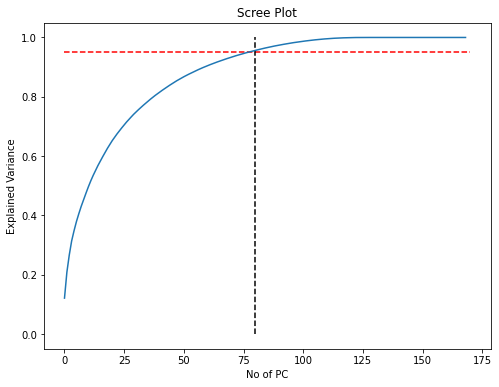

In [99]:
fig = plt.figure(figsize=(8,6))
plt.plot(variance_sum)
plt.hlines(y=0.95, xmax=170, xmin=0, colors='r', linestyles='--')
plt.vlines(x=80, ymax=1, ymin=0, colors='k', linestyles='--')
plt.xlabel('No of PC')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

In [100]:
# Performing PCA with 80 components
pca_sm_80 = PCA(n_components=80, random_state=42)
X_train_sm_pca = pca_sm_80.fit_transform(X_train_sm)
print(X_train_sm_pca.shape)

(38459, 80)


In [101]:
# Transforming test set
X_test_sm_pca = pca_sm_80.transform(X_test_sm)
print(X_test_sm_pca.shape)

(16483, 80)


In [102]:
smote_rf = RandomForestClassifier(random_state=42)
smote_rf.fit(X_train_sm_pca, y_train_sm)
y_pred = smote_rf.predict(X_test_sm_pca)

In [103]:
y_train_pred = smote_rf.predict(X_train_sm_pca)

In [104]:
# TRAIN SET
# CONFUSION MATRIX
cm = confusion_matrix(y_train_sm, y_train_pred)
print('Confusion matrix:\n{}'.format(cm))

# SENSITIVITY/RECALL
recall = recall_score(y_train_sm, y_train_pred)
print('Recall score of training set: {}%'.format(round(recall*100,2)))

# PRECISION
precision = precision_score(y_train_sm, y_train_pred)
print('\nPrecision score of training set: {}%'.format(round(precision*100,2)))

# ACCURACY
print("\nAccuracy on the training set: {}%".format(round(accuracy_score(y_train_sm, y_train_pred)*100),2))

Confusion matrix:
[[19199     0]
 [    0 19260]]
Recall score of training set: 100.0%

Precision score of training set: 100.0%

Accuracy on the training set: 100%


In [105]:
# TEST SET
# CONFUSION MATRIX
cm = confusion_matrix(y_test_sm, y_pred)
print('Confusion matrix:\n{}'.format(cm))

# SENSITIVITY/RECALL
recall = recall_score(y_test_sm, y_pred)
print('Recall score of test set: {}%'.format(round(recall*100,2)))

# PRECISION
precision = precision_score(y_test_sm, y_pred)
print('\nPrecision score of test set: {}%'.format(round(precision*100,2)))

# ACCURACY
print("\nAccuracy on the test set: {}%".format(round(accuracy_score(y_test_sm, y_pred)*100),2))

Confusion matrix:
[[7751  521]
 [ 292 7919]]
Recall score of test set: 96.44%

Precision score of test set: 93.83%

Accuracy on the test set: 95%


#### We will select this model(SMOTE) as our predictive model as it gives maximum recall value which indicates churn customers

## Building Interpretable model

In [106]:
df2 = df.copy()

In [107]:
df2.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,30,31,31,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.0,0.00,1.15,0.00,0.00,5.44,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,4,3,2,362,252,252,252,252,252,21,16,8,252,252,252,21,16,8,362,252,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1
1,7001865778,109,0.0,0.0,0.0,30,31,31,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.0,0.0,0.0,0.0,0.0,23.88,74.56,7.68,11.51,75.94,291.86,0.0,0.0,0.0,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.0,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.0,8.93,3.61,19.09,104.23,408.43,0.0,0.00,2.35,5.90,0.00,12.49,0.0,0.0,0.0,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.0,0.0,0.0,1.83,0.00,0.00,0.00,0.0,0.0,4,9,11,74,384,283,44,154,65,29,31,28,44,23,30,30,25,10,74,384,2.0,0.0,154.0,25.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,154.0,50.0,0.00,108.07,365.47,0.00

In [108]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [109]:
X = df2.drop(['mobile_number','circle_id','churn'], axis=1)
y = df2['churn']

In [110]:
X = scaler.fit_transform(X)
print(X.shape)

(30000, 169)


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=df2['churn'].values, random_state=42)

In [112]:
y_train.mean()

0.08428571428571428

In [113]:
y_test.mean()

0.08433333333333333

In [114]:
X_train.shape

(21000, 169)

#### Applying Random Forest model and selecting top 10 features

In [115]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [116]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n{}'.format(cm))

Confusion Matrix:
[[8128  113]
 [ 396  363]]


In [117]:
df_cols = list(df.columns)
X_cols = [i for i in df_cols if i not in ['mobile_number','circle_id','churn']]

In [118]:
importance_df = pd.DataFrame({'VarName':X_cols,
                            'Importance':rf.feature_importances_})

In [119]:
importance_df.sort_values(by='Importance', ascending=False)

,VarName,Importance
92,total_ic_mou_8,0.069231
68,loc_ic_t2m_mou_8,0.042048
74,loc_ic_mou_8,0.041042
65,loc_ic_t2t_mou_8,0.032666
62,total_og_mou_8,0.030730
8,arpu_8,0.028310
107,total_rech_amt_8,0.026098
110,max_rech_amt_8,0.019183
26,loc_og_t2m_mou_8,0.017603
35,loc_og_mou_8,0.016526


Selecting the top 10 features for analysis

In [120]:
top10 = importance_df.sort_values(by='Importance', ascending=False).iloc[:10,:]

In [121]:
top10

,VarName,Importance
92,total_ic_mou_8,0.069231
68,loc_ic_t2m_mou_8,0.042048
74,loc_ic_mou_8,0.041042
65,loc_ic_t2t_mou_8,0.032666
62,total_og_mou_8,0.030730
8,arpu_8,0.028310
107,total_rech_amt_8,0.026098
110,max_rech_amt_8,0.019183
26,loc_og_t2m_mou_8,0.017603
35,loc_og_mou_8,0.016526


Hence these are the top 10 features responsible for the customer churn

In [122]:
top10_feat = list(top10['VarName'])

Creating dataframe from top 10 features

In [123]:
df_top10 = df2[top10_feat]
df_top10.head()

,total_ic_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_8,loc_ic_t2t_mou_8,total_og_mou_8,arpu_8,total_rech_amt_8,max_rech_amt_8,loc_og_t2m_mou_8,loc_og_mou_8
0,5.44,4.13,5.44,0.16,0.00,213.803,252,252,0.00,0.00
1,423.28,375.58,408.43,29.23,312.44,268.321,283,65,291.86,299.54
4,338.81,104.13,337.94,233.81,208.16,238.174,287,110,124.26,208.16
8,16.54,15.48,15.79,0.31,171.56,137.362,120,30,50.54,63.04
9,219.86,122.58,172.51,49.93,100.78,170.231,210,50,34.93,57.36


In [124]:
X = df_top10
y = df2['churn']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

In [126]:
import statsmodels.api as sm

In [127]:
logreg = LogisticRegression()

In [128]:
# Logistic Regression model
logreg_sm = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
logreg_sm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20989
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4872.0
Date:                Mon, 07 Jun 2021   Deviance:                       9744.0
Time:                        22:51:32   Pearson chi2:                 2.51e+10
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8202      0.040    -20.711      0.000      -0.898      -0.743
total_ic_mou_8      -0.0021      0.001     -3.552      0.000      -0.003      -0.001
loc_ic_t2m_mou_8     0.0072      0.004      1.748      0.081      -0.001       0.015
loc_ic_mou_8        -0.0176      0.004     -4.513      0.000      -0.025      -0.010
loc_ic_t2t_mou_8     0.0174      0.004      4.366      0.000       0.010       0.025
total_og_mou_8       0.0002      0.000      1.504      0.133   -7.36e-05       0.001
arpu_8               0.0005      0.000      1.265      0.206      -0.000       0.001
total_rech_amt_8    -0.0025      0.000     -7.231      0.000      -0.003      -0.002
max_rech_amt_8      -0.0021      0.000     -4.452      0.000      -0.003      -0.001
loc_og_t2m_mou_8     0.0014      0.001      1.338      0.181      -0.001       0.003
loc_og_mou_8        -0.0016      0.001     -2.258      0.024      -0.003      -0.000
====================================================================================
"""

In [129]:
top10

,VarName,Importance
92,total_ic_mou_8,0.069231
68,loc_ic_t2m_mou_8,0.042048
74,loc_ic_mou_8,0.041042
65,loc_ic_t2t_mou_8,0.032666
62,total_og_mou_8,0.030730
8,arpu_8,0.028310
107,total_rech_amt_8,0.026098
110,max_rech_amt_8,0.019183
26,loc_og_t2m_mou_8,0.017603
35,loc_og_mou_8,0.016526


In [130]:
df_top10.shape

(30000, 10)

In [131]:
df['churn'] = df['churn'].dropna()
df['churn'].shape

(30000,)

In [132]:
df_top10['churn'] = df['churn']
df_top10.shape

(30000, 11)

In [133]:
df_top10.sample(10)

,total_ic_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_8,loc_ic_t2t_mou_8,total_og_mou_8,arpu_8,total_rech_amt_8,max_rech_amt_8,loc_og_t2m_mou_8,loc_og_mou_8,churn
11444,47.64,30.18,30.18,0.00,290.64,236.410,272,144,2.11,2.11,0
75885,484.26,267.41,483.58,165.46,498.58,595.271,686,198,229.29,498.58,0
3051,42.11,8.61,8.98,0.36,175.48,293.475,339,50,4.84,5.11,0
31978,67.11,34.81,64.28,28.93,191.18,32.774,274,250,80.94,113.96,0
47978,378.48,264.74,377.46,10.69,305.56,281.521,280,130,289.59,301.04,0
81249,0.00,0.00,0.00,0.00,0.00,1.000,0,0,0.00,0.00,0
52649,260.98,141.03,213.68,8.38,173.38,303.572,354,200,121.26,135.68,0
9207,249.03,100.29,216.39,115.94,321.09,646.212,1034,150,119.49,309.41,0
96473,396.81,240.99,312.86,69.76,1671.73,1017.927,1092,130,161.99,258.68,0
11083,3.53,0.46,0.46,0.00,91.61,262.179,362,198,13.48,15.34,0


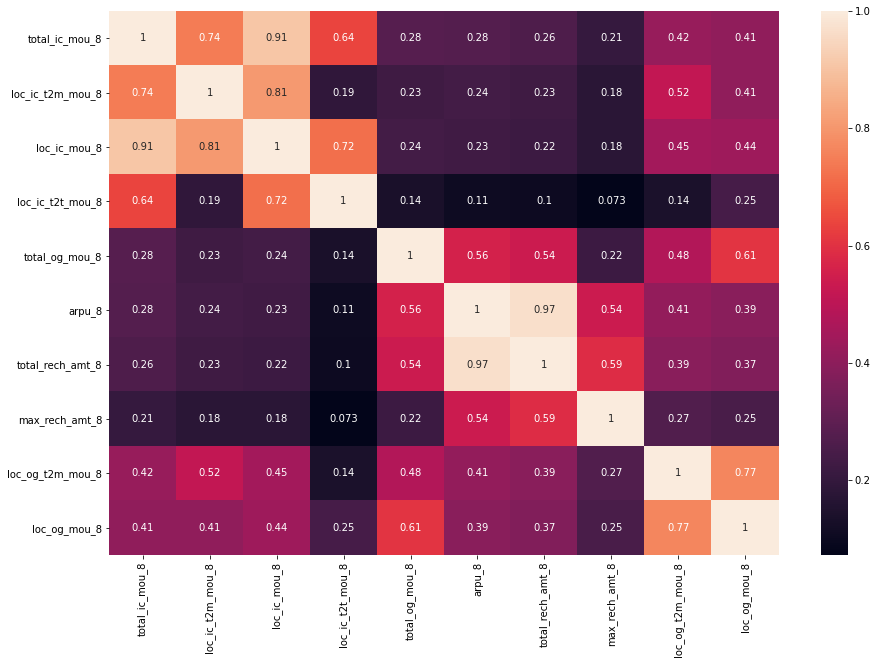

In [137]:
# HEATMAP
plt.figure(figsize=(15,10))
sns.heatmap(df_top10.corr(), annot=True)
plt.show()

In [135]:
df_top10['churn']=df_top10.churn.map({0:'NO', 1:'YES'})
df_top10.head()

,total_ic_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_8,loc_ic_t2t_mou_8,total_og_mou_8,arpu_8,total_rech_amt_8,max_rech_amt_8,loc_og_t2m_mou_8,loc_og_mou_8,churn
0,5.44,4.13,5.44,0.16,0.00,213.803,252,252,0.00,0.00,YES
1,423.28,375.58,408.43,29.23,312.44,268.321,283,65,291.86,299.54,NO
4,338.81,104.13,337.94,233.81,208.16,238.174,287,110,124.26,208.16,NO
8,16.54,15.48,15.79,0.31,171.56,137.362,120,30,50.54,63.04,NO
9,219.86,122.58,172.51,49.93,100.78,170.231,210,50,34.93,57.36,NO


In [145]:
df_top10.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,total_ic_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_8,loc_ic_t2t_mou_8,total_og_mou_8,arpu_8,total_rech_amt_8,max_rech_amt_8,loc_og_t2m_mou_8,loc_og_mou_8
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,234.099541,120.169417,188.551911,54.617987,314.752765,373.901957,433.111200,140.694567,102.117054,162.902973
std,343.267290,195.946654,295.778551,169.917571,534.295614,475.468619,575.828351,153.440255,179.540877,295.674942
min,0.000000,0.000000,0.000000,0.000000,0.000000,-197.957000,0.000000,0.000000,0.000000,0.000000
25%,37.880000,15.155000,26.340000,2.300000,16.910000,130.617750,148.000000,44.000000,3.810000,6.660000
50%,129.885000,59.790000,97.370000,15.940000,122.760000,267.711500,304.000000,130.000000,37.910000,60.670000
75%,295.495000,148.457500,235.060000,50.365000,388.700000,486.137000,567.000000,179.000000,123.890000,196.360000
90%,564.442000,289.365000,456.662000,117.381000,838.844000,796.328600,939.000000,252.000000,273.942000,429.130000
95%,817.635000,432.680500,668.730500,198.213500,1254.944500,1059.586850,1252.000000,339.000000,410.972500,647.732500
99%,1625.107600,883.931000,1394.086800,649.068000,2447.598200,1835.129210,2135.010000,655.000000,853.590400,1367.292300


<Figure size 1152x1152 with 0 Axes>

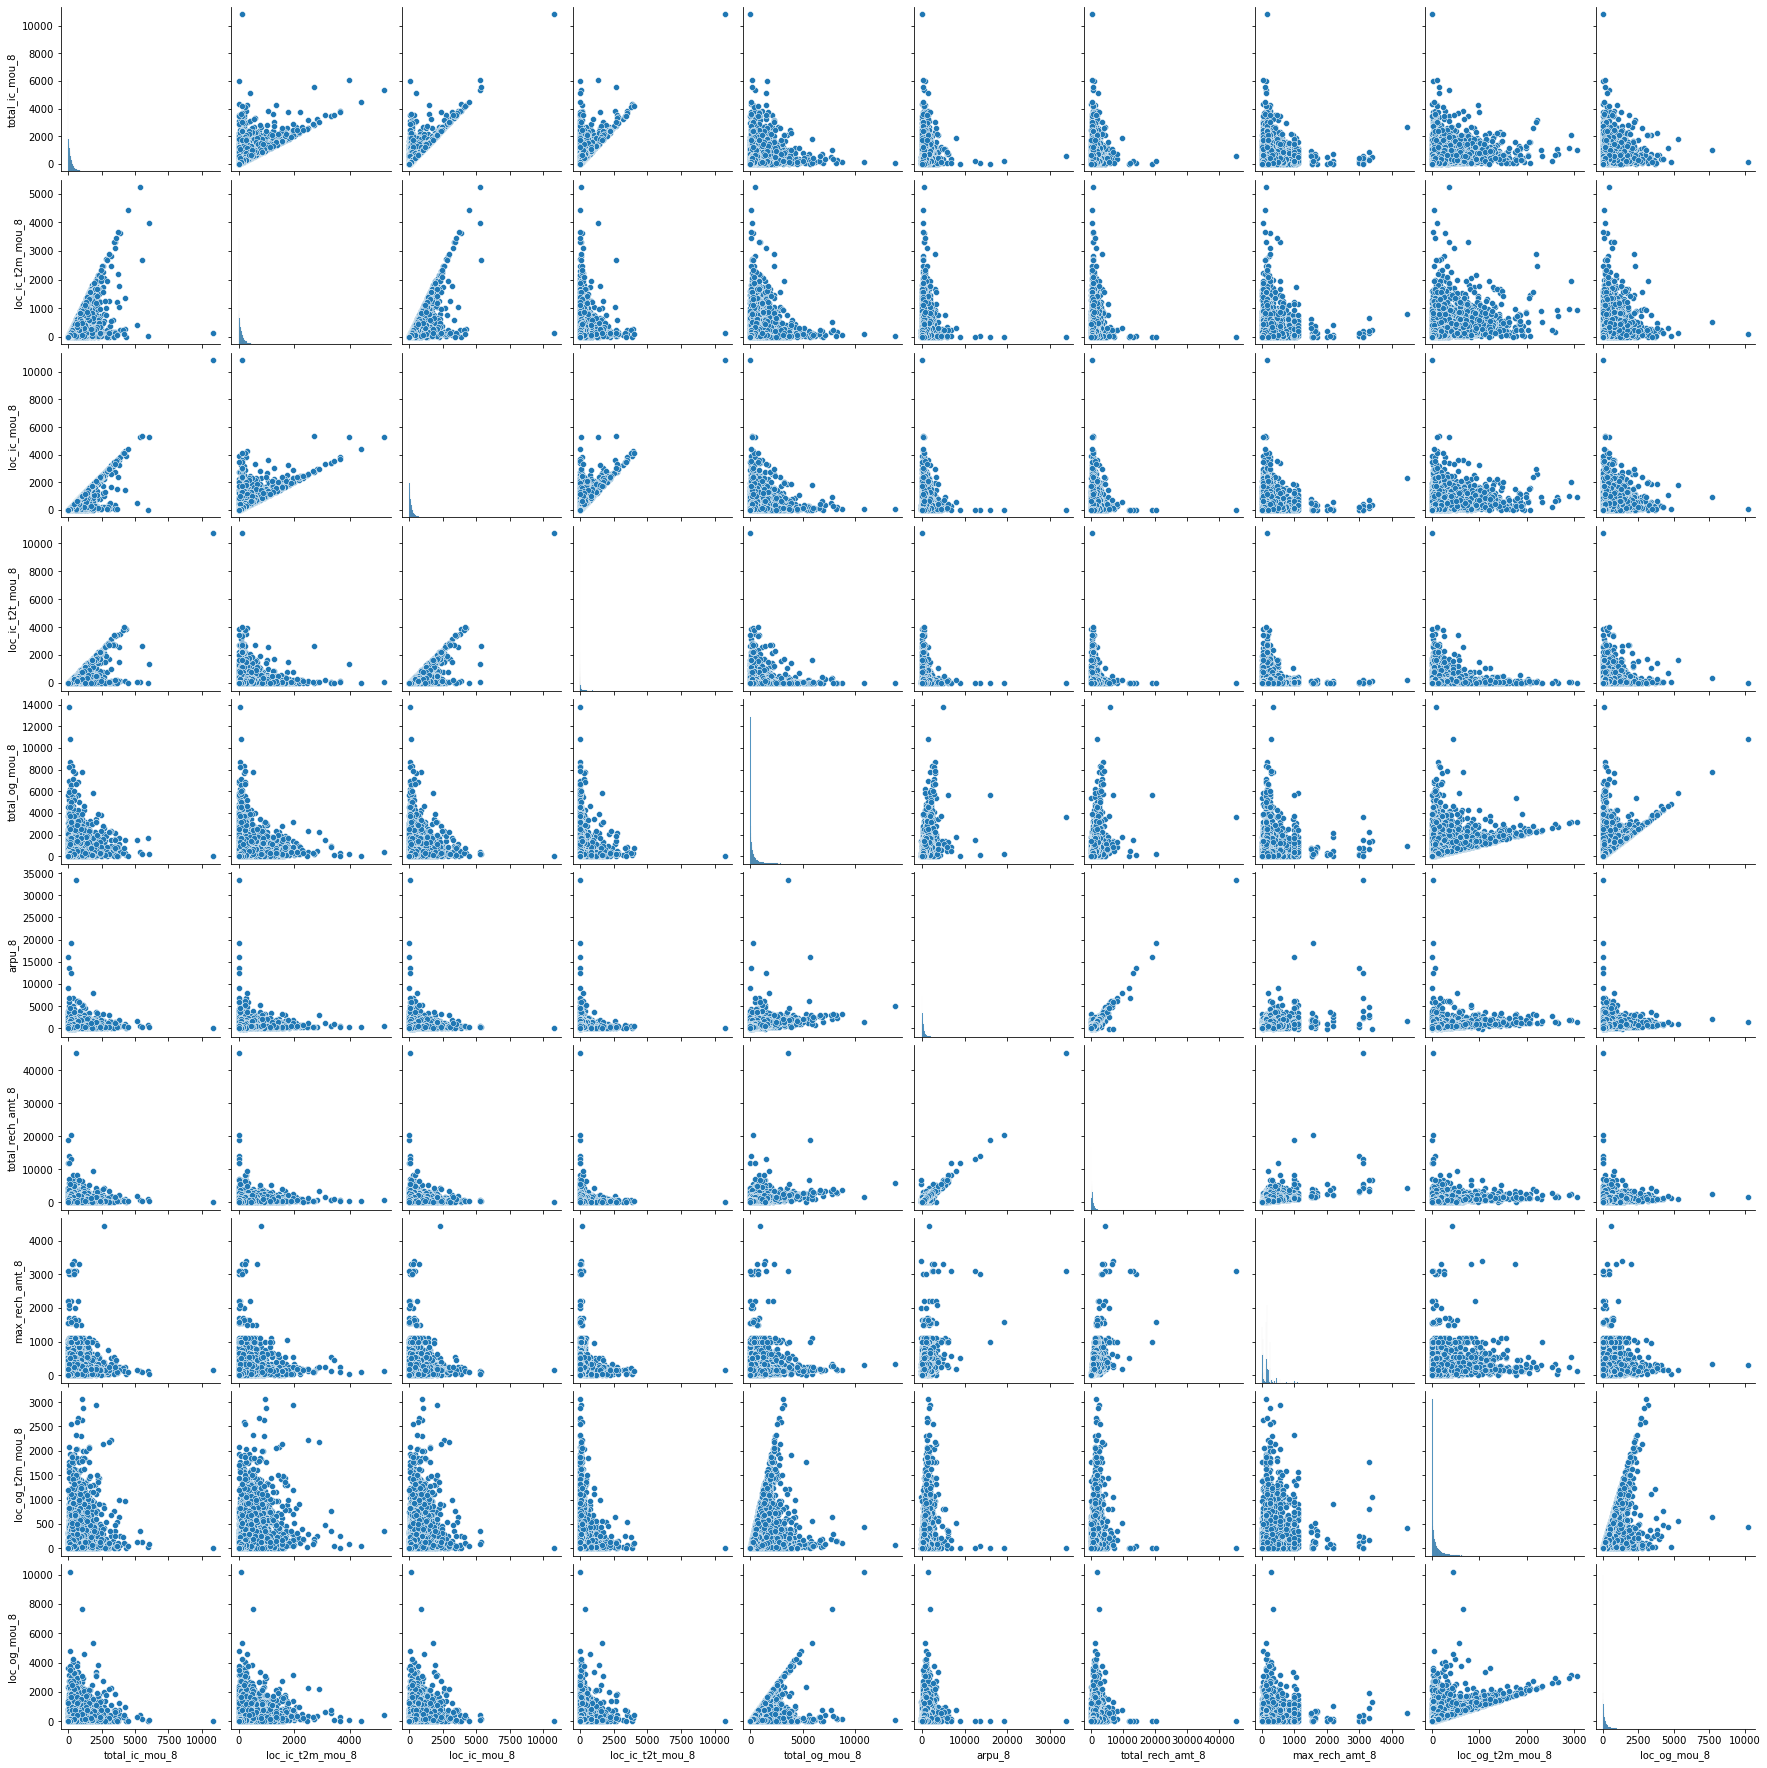

In [138]:
plt.figure(figsize=(16,16))
sns.pairplot(df_top10)
plt.show()

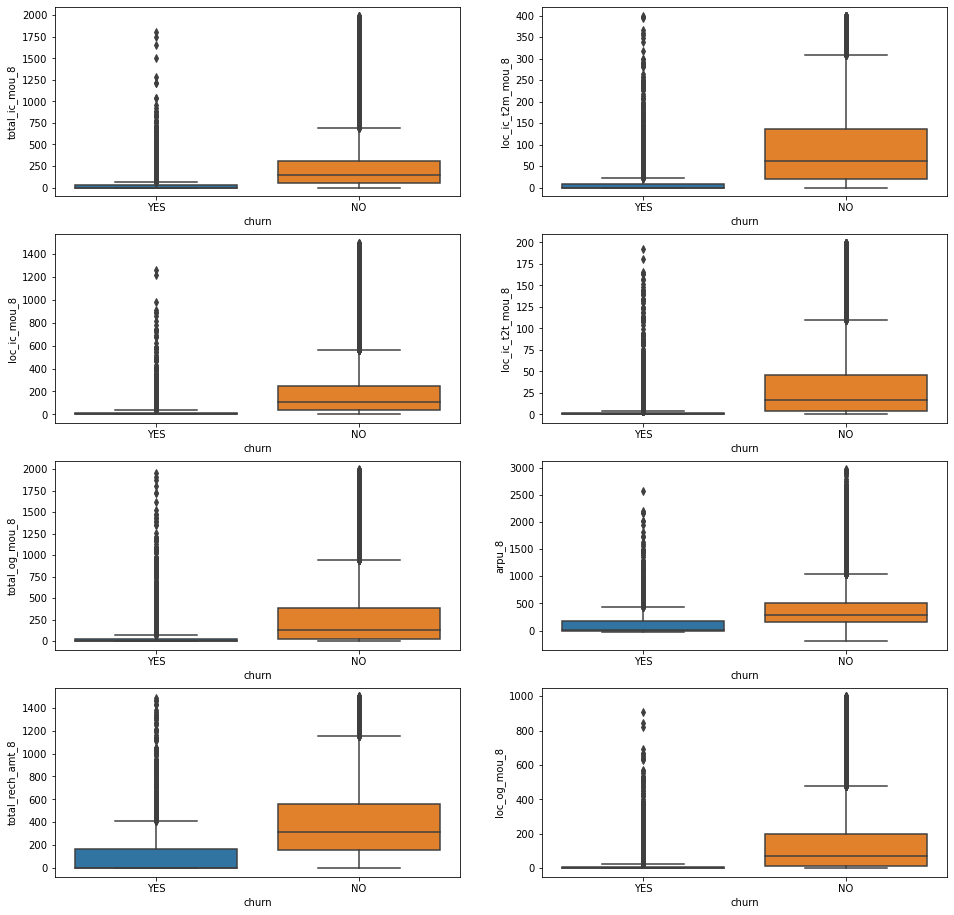

In [147]:
plt.figure(figsize=(16,16))
plt.subplot(4,2,1)
sns.boxplot(y='total_ic_mou_8',x='churn',data=df_top10[df_top10['total_ic_mou_8']<2000])

plt.subplot(4,2,2)
sns.boxplot(y='loc_ic_t2m_mou_8',x='churn',data=df_top10[df_top10['loc_ic_t2m_mou_8']<400])

plt.subplot(4,2,3)
sns.boxplot(y='loc_ic_mou_8',x='churn',data=df_top10[df_top10['loc_ic_mou_8']<1500])

plt.subplot(4,2,4)
sns.boxplot(y='loc_ic_t2t_mou_8',x='churn',data=df_top10[df_top10['loc_ic_t2t_mou_8']<200])

plt.subplot(4,2,5)
sns.boxplot(y='total_og_mou_8',x='churn',data=df_top10[df_top10['total_og_mou_8']<2000])

plt.subplot(4,2,6)
sns.boxplot(y='arpu_8',x='churn',data=df_top10[df_top10['arpu_8']<3000])

plt.subplot(4,2,7)
sns.boxplot(y='total_rech_amt_8',x='churn',data=df_top10[df_top10['total_rech_amt_8']<1500])

plt.subplot(4,2,8)
sns.boxplot(y='loc_og_mou_8',x='churn',data=df_top10[df_top10['loc_og_mou_8']<1000])
plt.show()

## Inferences:
- Customer behavior in the month of August has the highest impact on whether they churn or not
- Customer are more likely to churn if they have less total incoming minutes of usage and it holds for both calls between same operator and calls between different operators
- Similarly it holds for minutes of usage of outgoing calls alos
- Customers likely to churn tend to recharge very less in the month of August
- Incoming or Outgoing calls has more important in deciding customer churn than their internet usage